# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

/bin/bash: строка 1: gdown: команда не найдена
/bin/bash: строка 1: gdown: команда не найдена
/bin/bash: строка 1: gdown: команда не найдена


In [5]:
data = pd.read_csv('./train.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
# Посмотрим на случайные строчки нашего датасета

data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4818,70,114.30,8244.3,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
2195,3,29.70,91.7,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic),1
3582,65,24.80,1600.95,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
389,5,63.95,318.1,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
3355,10,65.50,616.9,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как оказалось, некоторые колонки имеют не совсем корректные значения: в TotalSpent есть пустые строки. Заменим  их на 0; в IsSeniorCitizen заменим 0, 1 на No, Yes соответственно

In [9]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', 0).astype('float64')

In [10]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace(0, 'No')
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace(1, 'Yes')

In [11]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Незаполненных значений нет

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

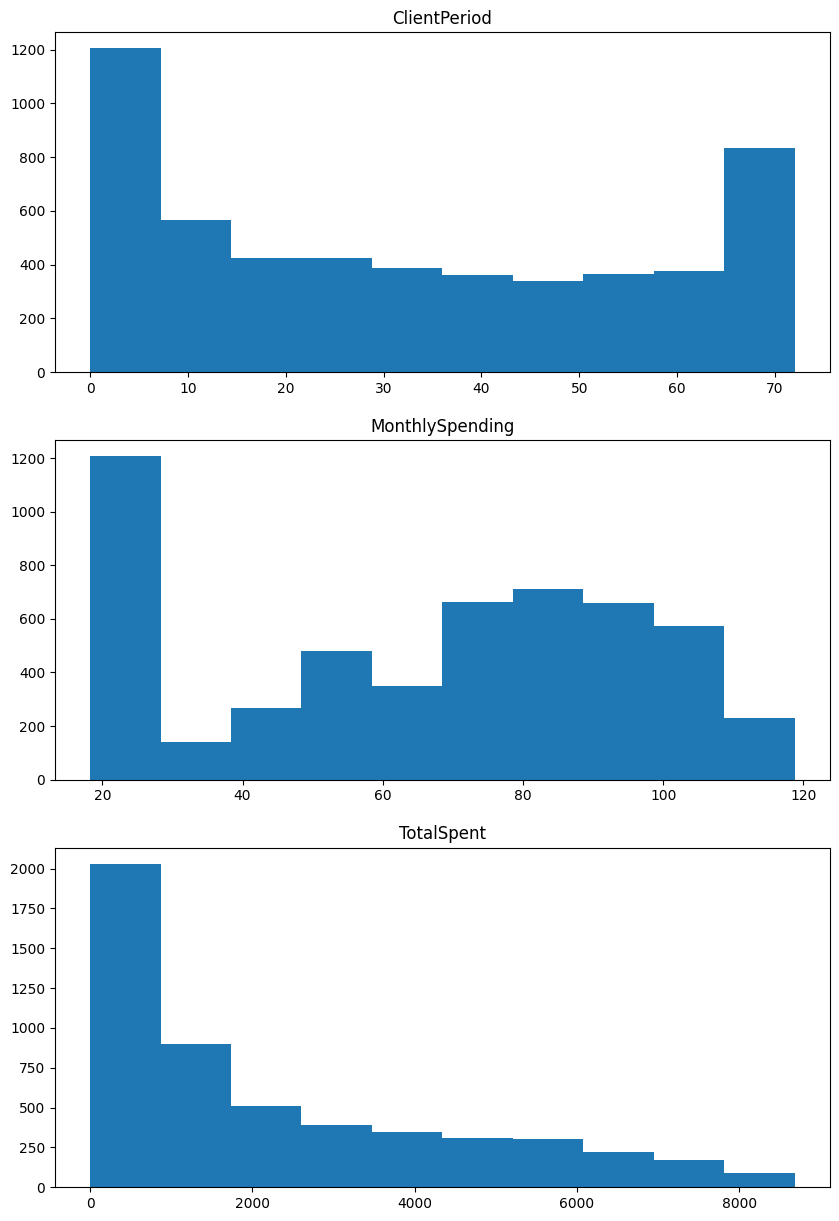

In [11]:
fig_num, ax_num = plt.subplots(len(num_cols), 1, figsize=(10, 5 * len(num_cols)))

# Построим гистограммы численных признаков
for i, col in enumerate(num_cols):
    ax_num[i].hist(data[col].dropna())
    ax_num[i].set_title(col)

plt.show()

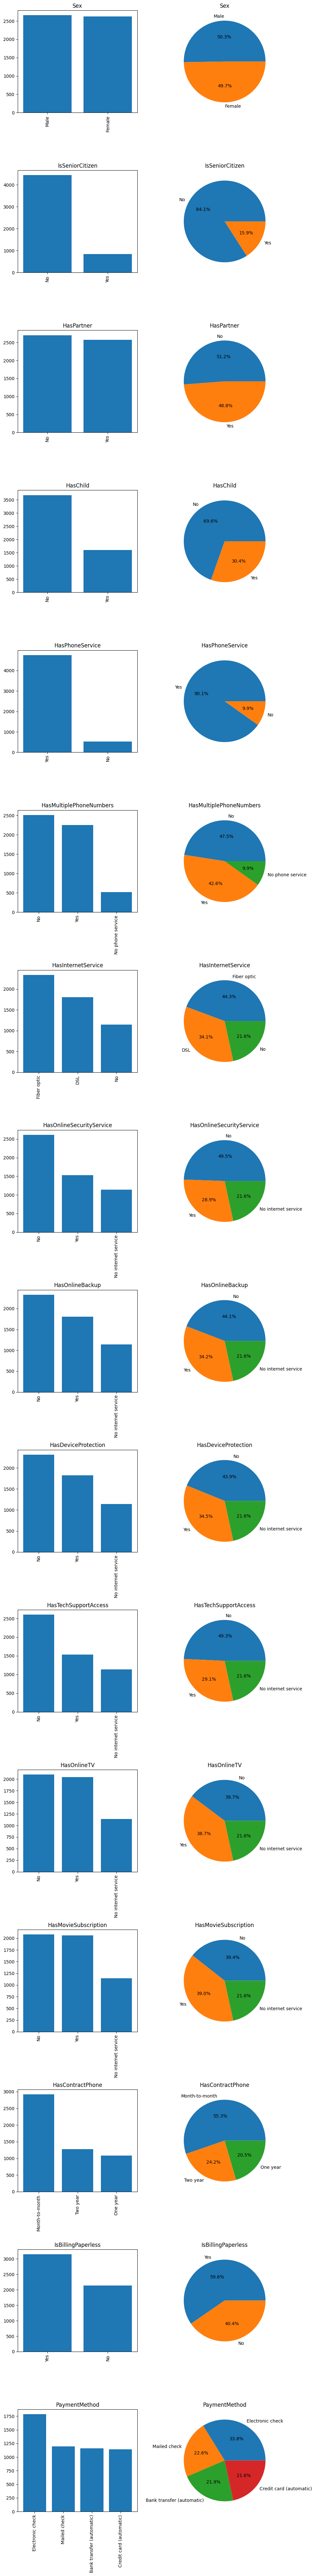

In [12]:
fig_cat, ax_cat = plt.subplots(len(cat_cols), 2, figsize=(10, 5 * len(cat_cols)))

# Построим bar и круговые диаграммы категориальных признаков
for i, col in enumerate(cat_cols):
    value_counts = data[col].value_counts()
    ax_cat[i, 0].bar(value_counts.index, value_counts.values)
    ax_cat[i, 0].set_title(col)
    ax_cat[i, 0].tick_params(axis='x', rotation=90)

    ax_cat[i, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    ax_cat[i, 1].set_title(col)

plt.tight_layout()
plt.show()

Количество наблюдений для каждого класса:
 0    3898
1    1384
Name: Churn, dtype: int64

Доля каждого класса:
 0    0.737978
1    0.262022
Name: Churn, dtype: float64


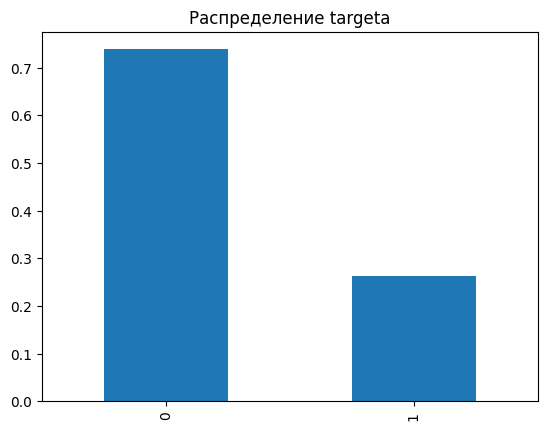

In [13]:
count_target = data[target_col].value_counts()
print("Количество наблюдений для каждого класса:\n", count_target)

class_proportions = count_target / count_target.sum()
print("\nДоля каждого класса:\n", class_proportions)

# Визуализация распределения
class_proportions.plot(kind='bar')
plt.title('Распределение targetа')
plt.show()

Класса 1 вдвое меньше класса 0, поэтому accuracy использовать не будем (ведь, например, предсказывая всегда 0, будем правы в 73% случаев).

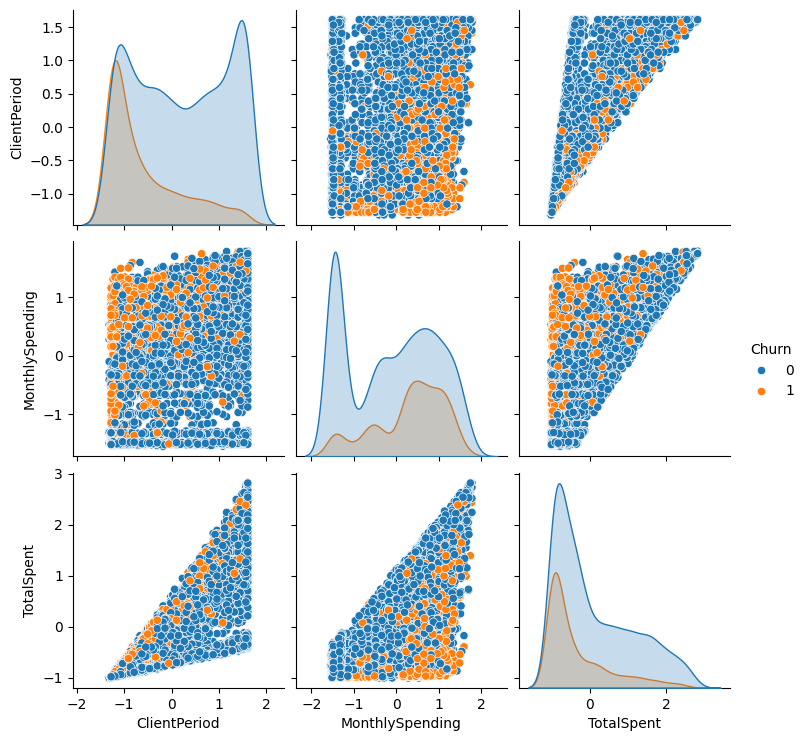

In [26]:
import seaborn as sns
sns.pairplot(data, hue='Churn')

plt.show()

Можем увидеть, как признаки распределяются и взаимодействуют в разных категориях

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [14]:
scaler = StandardScaler()
scaler.fit(data[num_cols])
data[num_cols] = scaler.transform(data[num_cols])

In [15]:
categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
X = pd.concat([data[num_cols], dummy_features], axis=1)

X.head() # X - обработанный датасет

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


тут внезапно было принято решение использовать кросс-валидацию =)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ],
)

In [18]:
pipeline = make_pipeline(
    preprocessor,
    LogisticRegression()
)

param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc'
)

grid_search.fit(data[feature_cols], data[target_col])

print("Лучшие параметры: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

preds = best_model.predict(data[feature_cols])
roc_auc_score(preds, data[target_col])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Лучшие параметры:  {'logisticregression__C': 100}


0.7549822665446226

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество roc_auc = 0.7549822665446226, с С = 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [19]:
!pip install catboost

In [37]:
# YOUR CODE
from catboost import CatBoostClassifier

# 1) Протестируем со стандартными параметрами

X_train, X_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

model = CatBoostClassifier(cat_features=cat_cols, verbose=200, random_seed=42)

model.fit(X_train, y_train)

preds_valid = model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, preds_valid)
print('ROC-AUC:', roc_auc)

Learning rate set to 0.019062
0:	learn: 0.6795793	total: 58.3ms	remaining: 58.3s
200:	learn: 0.3837617	total: 1.26s	remaining: 5.02s
400:	learn: 0.3647929	total: 2.46s	remaining: 3.67s
600:	learn: 0.3435483	total: 3.58s	remaining: 2.38s
800:	learn: 0.3251517	total: 4.78s	remaining: 1.19s
999:	learn: 0.3100870	total: 5.94s	remaining: 0us
ROC-AUC: 0.821409111478468


In [38]:
# 2) Подберем лучшие параметры с помощью перебора

n_estimators_list = [10000, 11000, 13000, 14000]
learning_rate_list = [0.0001, 0.001, 0.004, 0.003, 0.0035, 0.005, 0.01, 0.1]

results = {}

for trees in n_estimators_list:
    for lr in learning_rate_list:
        model = CatBoostClassifier(cat_features=cat_cols, n_estimators=trees,
                                   learning_rate=lr, verbose=200, random_seed=42)
        model.fit(X_train, y_train)
        preds_valid = model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, preds_valid)
        results[(trees, lr)] = (roc_auc, model)
        # print(f'n_estimators: {trees}, learning_rate: {lr}, ROC-AUC: {roc_auc}')

# Определение лучших параметров
best_params = max(results, key=results.get)
best_model = results[best_params]
print('Лучшие параметры:', best_params)
print('Лучшая ROC-AUC:', best_model[0])
best_model = best_model[1]

0:	learn: 0.6930748	total: 8.39ms	remaining: 1m 23s
200:	learn: 0.6799274	total: 1.38s	remaining: 1m 7s
400:	learn: 0.6669985	total: 2.57s	remaining: 1m 1s
600:	learn: 0.6545998	total: 3.59s	remaining: 56.1s
800:	learn: 0.6429490	total: 4.54s	remaining: 52.2s
1000:	learn: 0.6318323	total: 5.52s	remaining: 49.7s
1200:	learn: 0.6212654	total: 6.47s	remaining: 47.4s
1400:	learn: 0.6112758	total: 7.44s	remaining: 45.7s
1600:	learn: 0.6017666	total: 8.41s	remaining: 44.1s
1800:	learn: 0.5926555	total: 9.29s	remaining: 42.3s
2000:	learn: 0.5839962	total: 10.3s	remaining: 41.3s
2200:	learn: 0.5758441	total: 11.4s	remaining: 40.5s
2400:	learn: 0.5680704	total: 12.7s	remaining: 40.1s
2600:	learn: 0.5607749	total: 13.9s	remaining: 39.6s
2800:	learn: 0.5538819	total: 15.2s	remaining: 39.2s
3000:	learn: 0.5473067	total: 16.6s	remaining: 38.6s
3200:	learn: 0.5410950	total: 17.8s	remaining: 37.9s
3400:	learn: 0.5351517	total: 19.1s	remaining: 37s
3600:	learn: 0.5295649	total: 20.4s	remaining: 36.2s


600:	learn: 0.4068382	total: 4.48s	remaining: 1m 10s
800:	learn: 0.3967409	total: 5.96s	remaining: 1m 8s
1000:	learn: 0.3901351	total: 7.45s	remaining: 1m 6s
1200:	learn: 0.3852040	total: 8.97s	remaining: 1m 5s
1400:	learn: 0.3813914	total: 10.4s	remaining: 1m 4s
1600:	learn: 0.3781714	total: 11.9s	remaining: 1m 2s
1800:	learn: 0.3751866	total: 13.4s	remaining: 1m
2000:	learn: 0.3725578	total: 14.8s	remaining: 59.1s
2200:	learn: 0.3699116	total: 16.2s	remaining: 57.5s
2400:	learn: 0.3670561	total: 17.8s	remaining: 56.3s
2600:	learn: 0.3641820	total: 19.4s	remaining: 55.2s
2800:	learn: 0.3612349	total: 20.9s	remaining: 53.8s
3000:	learn: 0.3577785	total: 22.6s	remaining: 52.7s
3200:	learn: 0.3541729	total: 24.3s	remaining: 51.5s
3400:	learn: 0.3506665	total: 25.9s	remaining: 50.3s
3600:	learn: 0.3471502	total: 27.6s	remaining: 49.1s
3800:	learn: 0.3438620	total: 29.3s	remaining: 47.8s
4000:	learn: 0.3406811	total: 31s	remaining: 46.5s
4200:	learn: 0.3376179	total: 32.7s	remaining: 45.2s

1200:	learn: 0.3416430	total: 9.34s	remaining: 1m 8s
1400:	learn: 0.3319637	total: 11.1s	remaining: 1m 8s
1600:	learn: 0.3236019	total: 12.8s	remaining: 1m 7s
1800:	learn: 0.3157470	total: 14.5s	remaining: 1m 6s
2000:	learn: 0.3074708	total: 16.3s	remaining: 1m 5s
2200:	learn: 0.2995004	total: 18.1s	remaining: 1m 3s
2400:	learn: 0.2922172	total: 19.8s	remaining: 1m 2s
2600:	learn: 0.2853850	total: 21.6s	remaining: 1m 1s
2800:	learn: 0.2783135	total: 23.4s	remaining: 1m
3000:	learn: 0.2722092	total: 25.1s	remaining: 58.6s
3200:	learn: 0.2658834	total: 26.9s	remaining: 57.1s
3400:	learn: 0.2600262	total: 28.6s	remaining: 55.5s
3600:	learn: 0.2547996	total: 30.4s	remaining: 54s
3800:	learn: 0.2497496	total: 32.1s	remaining: 52.4s
4000:	learn: 0.2445511	total: 33.9s	remaining: 50.8s
4200:	learn: 0.2397440	total: 35.7s	remaining: 49.2s
4400:	learn: 0.2348652	total: 37.4s	remaining: 47.6s
4600:	learn: 0.2301391	total: 39.2s	remaining: 46s
4800:	learn: 0.2259133	total: 41s	remaining: 44.4s
50

600:	learn: 0.4801446	total: 4.37s	remaining: 1m 15s
800:	learn: 0.4548327	total: 5.88s	remaining: 1m 14s
1000:	learn: 0.4379870	total: 7.37s	remaining: 1m 13s
1200:	learn: 0.4267921	total: 8.8s	remaining: 1m 11s
1400:	learn: 0.4185128	total: 10.3s	remaining: 1m 10s
1600:	learn: 0.4121727	total: 11.7s	remaining: 1m 8s
1800:	learn: 0.4069757	total: 13.2s	remaining: 1m 7s
2000:	learn: 0.4030375	total: 14.7s	remaining: 1m 6s
2200:	learn: 0.3997514	total: 16.2s	remaining: 1m 4s
2400:	learn: 0.3968432	total: 17.7s	remaining: 1m 3s
2600:	learn: 0.3943654	total: 19.1s	remaining: 1m 1s
2800:	learn: 0.3921264	total: 20.6s	remaining: 1m
3000:	learn: 0.3901541	total: 22.1s	remaining: 58.8s
3200:	learn: 0.3884582	total: 23.5s	remaining: 57.2s
3400:	learn: 0.3868982	total: 25s	remaining: 55.8s
3600:	learn: 0.3853990	total: 26.4s	remaining: 54.3s
3800:	learn: 0.3840608	total: 27.9s	remaining: 52.8s
4000:	learn: 0.3828626	total: 29.3s	remaining: 51.2s
4200:	learn: 0.3817015	total: 30.7s	remaining: 49

9200:	learn: 0.2795059	total: 1m 16s	remaining: 15.1s
9400:	learn: 0.2777068	total: 1m 18s	remaining: 13.4s
9600:	learn: 0.2759939	total: 1m 20s	remaining: 11.7s
9800:	learn: 0.2742063	total: 1m 22s	remaining: 10.1s
10000:	learn: 0.2723977	total: 1m 24s	remaining: 8.41s
10200:	learn: 0.2706378	total: 1m 25s	remaining: 6.73s
10400:	learn: 0.2687968	total: 1m 27s	remaining: 5.05s
10600:	learn: 0.2670811	total: 1m 29s	remaining: 3.37s
10800:	learn: 0.2654214	total: 1m 31s	remaining: 1.68s
10999:	learn: 0.2637787	total: 1m 32s	remaining: 0us
0:	learn: 0.6906227	total: 16.8ms	remaining: 3m 5s
200:	learn: 0.4664808	total: 1.5s	remaining: 1m 20s
400:	learn: 0.4187546	total: 2.96s	remaining: 1m 18s
600:	learn: 0.4017439	total: 4.46s	remaining: 1m 17s
800:	learn: 0.3927548	total: 5.97s	remaining: 1m 16s
1000:	learn: 0.3868436	total: 7.41s	remaining: 1m 14s
1200:	learn: 0.3819926	total: 8.91s	remaining: 1m 12s
1400:	learn: 0.3785219	total: 10.4s	remaining: 1m 10s
1600:	learn: 0.3751172	total: 11

6600:	learn: 0.1902325	total: 59.5s	remaining: 39.7s
6800:	learn: 0.1868110	total: 1m 1s	remaining: 37.9s
7000:	learn: 0.1833546	total: 1m 3s	remaining: 36.1s
7200:	learn: 0.1801646	total: 1m 5s	remaining: 34.4s
7400:	learn: 0.1767372	total: 1m 6s	remaining: 32.6s
7600:	learn: 0.1738593	total: 1m 8s	remaining: 30.8s
7800:	learn: 0.1709801	total: 1m 10s	remaining: 29s
8000:	learn: 0.1681689	total: 1m 12s	remaining: 27.2s
8200:	learn: 0.1651893	total: 1m 14s	remaining: 25.4s
8400:	learn: 0.1625188	total: 1m 16s	remaining: 23.6s
8600:	learn: 0.1598711	total: 1m 18s	remaining: 21.8s
8800:	learn: 0.1572636	total: 1m 19s	remaining: 20s
9000:	learn: 0.1547248	total: 1m 21s	remaining: 18.1s
9200:	learn: 0.1520073	total: 1m 23s	remaining: 16.3s
9400:	learn: 0.1495798	total: 1m 25s	remaining: 14.5s
9600:	learn: 0.1472412	total: 1m 27s	remaining: 12.7s
9800:	learn: 0.1449296	total: 1m 29s	remaining: 10.9s
10000:	learn: 0.1427772	total: 1m 31s	remaining: 9.09s
10200:	learn: 0.1406615	total: 1m 32s

2000:	learn: 0.4030375	total: 7.71s	remaining: 42.4s
2200:	learn: 0.3997514	total: 8.48s	remaining: 41.6s
2400:	learn: 0.3968432	total: 9.28s	remaining: 40.9s
2600:	learn: 0.3943654	total: 10s	remaining: 40.2s
2800:	learn: 0.3921264	total: 10.9s	remaining: 39.8s
3000:	learn: 0.3901541	total: 11.7s	remaining: 39.1s
3200:	learn: 0.3884582	total: 12.5s	remaining: 38.4s
3400:	learn: 0.3868982	total: 13.3s	remaining: 37.6s
3600:	learn: 0.3853990	total: 14.1s	remaining: 36.9s
3800:	learn: 0.3840608	total: 14.9s	remaining: 36.2s
4000:	learn: 0.3828626	total: 15.7s	remaining: 35.4s
4200:	learn: 0.3817015	total: 16.5s	remaining: 34.6s
4400:	learn: 0.3804997	total: 17.3s	remaining: 33.9s
4600:	learn: 0.3794843	total: 18.1s	remaining: 33.1s
4800:	learn: 0.3784477	total: 18.9s	remaining: 32.3s
5000:	learn: 0.3773321	total: 19.7s	remaining: 31.5s
5200:	learn: 0.3763923	total: 20.5s	remaining: 30.7s
5400:	learn: 0.3754341	total: 21.3s	remaining: 29.9s
5600:	learn: 0.3745164	total: 22.1s	remaining: 2

6600:	learn: 0.3078557	total: 31.3s	remaining: 30.3s
6800:	learn: 0.3056164	total: 32.3s	remaining: 29.4s
7000:	learn: 0.3032883	total: 33.3s	remaining: 28.5s
7200:	learn: 0.3009435	total: 34.3s	remaining: 27.6s
7400:	learn: 0.2984796	total: 35.3s	remaining: 26.7s
7600:	learn: 0.2964227	total: 36.3s	remaining: 25.8s
7800:	learn: 0.2939986	total: 37.3s	remaining: 24.9s
8000:	learn: 0.2918345	total: 38.3s	remaining: 23.9s
8200:	learn: 0.2897323	total: 39.3s	remaining: 23s
8400:	learn: 0.2874451	total: 40.3s	remaining: 22.1s
8600:	learn: 0.2852233	total: 41.3s	remaining: 21.1s
8800:	learn: 0.2832872	total: 42.3s	remaining: 20.2s
9000:	learn: 0.2813797	total: 43.3s	remaining: 19.3s
9200:	learn: 0.2795059	total: 44.3s	remaining: 18.3s
9400:	learn: 0.2777068	total: 45.3s	remaining: 17.4s
9600:	learn: 0.2759939	total: 46.3s	remaining: 16.4s
9800:	learn: 0.2742063	total: 47.3s	remaining: 15.4s
10000:	learn: 0.2723977	total: 48.3s	remaining: 14.5s
10200:	learn: 0.2706378	total: 49.3s	remaining:

11200:	learn: 0.2086444	total: 54.4s	remaining: 8.73s
11400:	learn: 0.2068566	total: 55.4s	remaining: 7.76s
11600:	learn: 0.2049725	total: 56.3s	remaining: 6.79s
11800:	learn: 0.2030622	total: 57.3s	remaining: 5.83s
12000:	learn: 0.2012634	total: 58.3s	remaining: 4.85s
12200:	learn: 0.1993227	total: 59.3s	remaining: 3.88s
12400:	learn: 0.1975488	total: 1m	remaining: 2.91s
12600:	learn: 0.1957709	total: 1m 1s	remaining: 1.94s
12800:	learn: 0.1939540	total: 1m 2s	remaining: 969ms
12999:	learn: 0.1922924	total: 1m 3s	remaining: 0us
0:	learn: 0.6859740	total: 5.05ms	remaining: 1m 5s
200:	learn: 0.4032171	total: 853ms	remaining: 54.3s
400:	learn: 0.3832700	total: 1.71s	remaining: 53.6s
600:	learn: 0.3734456	total: 2.57s	remaining: 53s
800:	learn: 0.3639899	total: 3.44s	remaining: 52.4s
1000:	learn: 0.3520224	total: 4.41s	remaining: 52.8s
1200:	learn: 0.3416430	total: 5.4s	remaining: 53.1s
1400:	learn: 0.3319637	total: 6.39s	remaining: 52.9s
1600:	learn: 0.3236019	total: 7.38s	remaining: 52.

2600:	learn: 0.5607749	total: 10.6s	remaining: 46.6s
2800:	learn: 0.5538819	total: 11.5s	remaining: 45.9s
3000:	learn: 0.5473067	total: 12.3s	remaining: 45.1s
3200:	learn: 0.5410950	total: 13.1s	remaining: 44.4s
3400:	learn: 0.5351517	total: 14s	remaining: 43.6s
3600:	learn: 0.5295649	total: 14.8s	remaining: 42.8s
3800:	learn: 0.5242016	total: 15.7s	remaining: 42.1s
4000:	learn: 0.5190204	total: 16.5s	remaining: 41.3s
4200:	learn: 0.5141295	total: 17.4s	remaining: 40.5s
4400:	learn: 0.5094761	total: 18.2s	remaining: 39.7s
4600:	learn: 0.5050563	total: 19.1s	remaining: 38.9s
4800:	learn: 0.5007986	total: 19.9s	remaining: 38.1s
5000:	learn: 0.4966849	total: 20.8s	remaining: 37.4s
5200:	learn: 0.4928060	total: 21.6s	remaining: 36.6s
5400:	learn: 0.4891784	total: 22.5s	remaining: 35.8s
5600:	learn: 0.4856758	total: 23.3s	remaining: 35s
5800:	learn: 0.4823618	total: 24.2s	remaining: 34.2s
6000:	learn: 0.4791469	total: 25s	remaining: 33.3s
6200:	learn: 0.4760868	total: 25.8s	remaining: 32.5s

5400:	learn: 0.3019313	total: 24.9s	remaining: 39.7s
5600:	learn: 0.2989316	total: 25.9s	remaining: 38.8s
5800:	learn: 0.2960639	total: 26.9s	remaining: 38s
6000:	learn: 0.2929714	total: 27.9s	remaining: 37.1s
6200:	learn: 0.2899975	total: 28.8s	remaining: 36.3s
6400:	learn: 0.2872950	total: 29.8s	remaining: 35.4s
6600:	learn: 0.2846964	total: 30.8s	remaining: 34.5s
6800:	learn: 0.2821624	total: 31.8s	remaining: 33.6s
7000:	learn: 0.2795321	total: 32.8s	remaining: 32.8s
7200:	learn: 0.2768403	total: 33.7s	remaining: 31.9s
7400:	learn: 0.2742081	total: 34.7s	remaining: 31s
7600:	learn: 0.2717578	total: 35.7s	remaining: 30.1s
7800:	learn: 0.2691711	total: 36.7s	remaining: 29.2s
8000:	learn: 0.2666617	total: 37.7s	remaining: 28.3s
8200:	learn: 0.2644855	total: 38.7s	remaining: 27.3s
8400:	learn: 0.2622507	total: 39.7s	remaining: 26.4s
8600:	learn: 0.2599878	total: 40.6s	remaining: 25.5s
8800:	learn: 0.2578108	total: 41.7s	remaining: 24.6s
9000:	learn: 0.2558866	total: 42.6s	remaining: 23.

8000:	learn: 0.2789937	total: 37.2s	remaining: 27.9s
8200:	learn: 0.2766825	total: 38.2s	remaining: 27s
8400:	learn: 0.2743431	total: 39.2s	remaining: 26.1s
8600:	learn: 0.2720517	total: 40.1s	remaining: 25.2s
8800:	learn: 0.2699453	total: 41.1s	remaining: 24.3s
9000:	learn: 0.2678605	total: 42.1s	remaining: 23.4s
9200:	learn: 0.2659144	total: 43.1s	remaining: 22.5s
9400:	learn: 0.2638787	total: 44.1s	remaining: 21.6s
9600:	learn: 0.2619807	total: 45s	remaining: 20.6s
9800:	learn: 0.2600323	total: 46.1s	remaining: 19.7s
10000:	learn: 0.2580818	total: 47s	remaining: 18.8s
10200:	learn: 0.2561568	total: 48s	remaining: 17.9s
10400:	learn: 0.2543696	total: 49s	remaining: 17s
10600:	learn: 0.2525441	total: 50s	remaining: 16s
10800:	learn: 0.2506148	total: 51s	remaining: 15.1s
11000:	learn: 0.2487520	total: 52s	remaining: 14.2s
11200:	learn: 0.2468619	total: 53s	remaining: 13.2s
11400:	learn: 0.2450427	total: 54s	remaining: 12.3s
11600:	learn: 0.2434574	total: 55s	remaining: 11.4s
11800:	lea

10800:	learn: 0.1349573	total: 53.5s	remaining: 15.8s
11000:	learn: 0.1329351	total: 54.5s	remaining: 14.9s
11200:	learn: 0.1308696	total: 55.6s	remaining: 13.9s
11400:	learn: 0.1289240	total: 56.6s	remaining: 12.9s
11600:	learn: 0.1270750	total: 57.6s	remaining: 11.9s
11800:	learn: 0.1253710	total: 58.6s	remaining: 10.9s
12000:	learn: 0.1236929	total: 59.6s	remaining: 9.93s
12200:	learn: 0.1218588	total: 1m	remaining: 8.93s
12400:	learn: 0.1200740	total: 1m 1s	remaining: 7.94s
12600:	learn: 0.1184046	total: 1m 2s	remaining: 6.95s
12800:	learn: 0.1169549	total: 1m 3s	remaining: 5.96s
13000:	learn: 0.1153227	total: 1m 4s	remaining: 4.96s
13200:	learn: 0.1137074	total: 1m 5s	remaining: 3.97s
13400:	learn: 0.1120058	total: 1m 6s	remaining: 2.98s
13600:	learn: 0.1104609	total: 1m 7s	remaining: 1.98s
13800:	learn: 0.1089650	total: 1m 8s	remaining: 989ms
13999:	learn: 0.1074982	total: 1m 9s	remaining: 0us
0:	learn: 0.6268933	total: 5.13ms	remaining: 1m 11s
200:	learn: 0.3113640	total: 880ms	

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [39]:
best_model = best_model

In [40]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] #, не забудьте выделить вероятность класса 1.
submission = submission.drop(['Id'], axis=1)
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

In [17]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [18]:
y = data["Churn"]

In [19]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели логистической регрессии с кросс-валидацией
# Cs - диапазон значений C для поиска лучшего параметра
# cv - количество фолдов при кросс-валидации
# scoring - метрика, по которой будет производиться осуждение (мы используем ROC AUC)
# refit - если True, то после выбора наилучшего параметра C, модель будет обучена на всех данных
# random_state - передаем для воспроизводимости результатов
log_reg_cv = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True, random_state=42)

# Обучение модели
log_reg_cv.fit(X_train, y_train)

# Используем лучший параметр C для обучения на всем датасете
print(f'Оптимальное значение C: {log_reg_cv.C_}')

Оптимальное значение C: [166.81005372]


In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Предсказание вероятностей классов на валидационной выборке
y_pred_proba = log_reg_cv.predict_proba(X_valid)[:, 1]

# Вычисление метрики ROC AUC
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print('ROC AUC:', roc_auc)



ROC AUC: 0.8268301918157387


In [26]:
best_model = log_reg_cv

In [ ]:
best_model.predict_proba(X_test)[:, 1] #, не забудьте выделить вероятность класса 1.
submission = submission.drop(['Id'], axis=1)
submission.to_csv('./my_submission.csv')

In [34]:
X_test = pd.read_csv('./test.csv')

X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [35]:
X_valid.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1448,-0.953113,-0.647081,-0.823633,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4792,0.187510,0.179801,0.116982,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
8,0.717084,1.359640,1.346204,0,1,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
3964,0.472665,1.165762,0.921559,0,1,1,0,1,0,1,...,1,0,0,1,1,0,1,0,0,0
240,-0.301328,-1.457391,-0.789981,0,1,1,0,0,1,1,...,0,0,1,0,0,1,1,0,0,0
